___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


# Objetivo

Analisar como o tamanho da família influencia na obtenção de Internet por pessoas de  

___
## Análise e Resultados

In [40]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [41]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/adesktop/Documents/ C. Dados


In [42]:
#Se usar o arquivo descompactado
dados2015=pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [43]:
#RENDA DA CLASSE C (+- 4000 A 9000)

dados2015=dados2015.loc[(dados2015.V4614>=4000) & (dados2015.V4614<=9000),['V0105','V02426','V02424','V4614']] #define colunas
dados2015.head()

,V0105,V02426,V02424,V4614
3,6.0,2.0,2.0,4760.0
4,2.0,NaN,NaN,5800.0
7,3.0,NaN,NaN,4000.0
8,5.0,2.0,2.0,4090.0
10,3.0,2.0,2.0,5150.0


In [44]:
#Definindo famílias

dados2015.loc[(dados2015.V0105>=3) & (dados2015.V0105<=5),"Familia"]="Média"
dados2015.loc[(dados2015.V0105>=1) & (dados2015.V0105<=2),"Familia"]="Pequena"
dados2015.loc[(dados2015.V0105>=6),"Familia"]="Grande"
dados2015.head()

,V0105,V02426,V02424,V4614,Familia
3,6.0,2.0,2.0,4760.0,Grande
4,2.0,NaN,NaN,5800.0,Pequena
7,3.0,NaN,NaN,4000.0,Média
8,5.0,2.0,2.0,4090.0,Média
10,3.0,2.0,2.0,5150.0,Média


In [45]:
dados2015.V02426 = dados2015.V02426.astype("category")
dados2015.V02424 = dados2015.V02424.astype("category")

dados2015.V02426.cat.categories = ("Sim","Nao")
dados2015.V02424.cat.categories = ("Sim","Não")

dados2015 = dados2015.rename(columns={"V0105":"Familia?","V02426": "Tem_Banda","V02424":"Tem_3G"})


dados2015 = dados2015[pd.notnull(dados2015["Familia"])]
dados2015 = dados2015[pd.notnull(dados2015["Tem_Banda"])]
dados2015 = dados2015[pd.notnull(dados2015["Tem_3G"])]



dados2015.head()

,Familia?,Tem_Banda,Tem_3G,V4614,Familia
3,6.0,Sim,Sim,4760.0,Grande
8,5.0,Sim,Sim,4090.0,Média
10,3.0,Sim,Sim,5150.0,Média
18,5.0,Sim,Não,7188.0,Média
23,3.0,Sim,Não,8000.0,Média


In [46]:
ct = pd.crosstab(dados2015.Familia, dados2015.Tem_Banda)
ct

Tem_Banda,Sim,Nao
Familia,,
Grande,817,279
Média,8751,1621
Pequena,3785,677


In [47]:
ct = pd.crosstab(dados2015.Familia, dados2015.Tem_3G)
ct

Tem_3G,Sim,Não
Familia,,
Grande,791,305
Média,7109,3263
Pequena,2961,1501


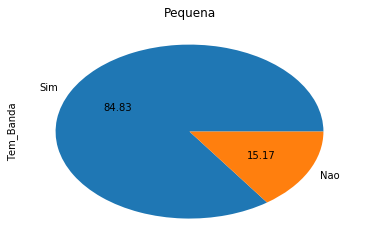

In [48]:
adim = dados2015.Tem_Banda[dados2015.Familia == 'Pequena'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Pequena')

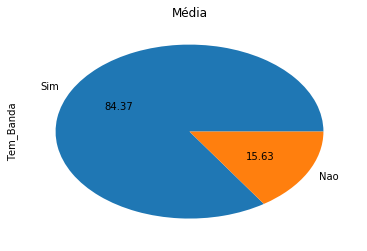

In [49]:
adim = dados2015.Tem_Banda[dados2015.Familia == 'Média'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Média')

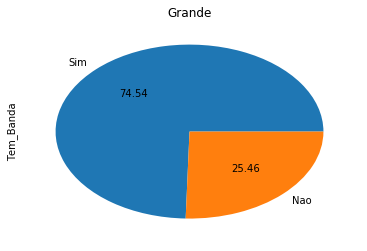

In [50]:
adim = dados2015.Tem_Banda[dados2015.Familia == 'Grande'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Grande')

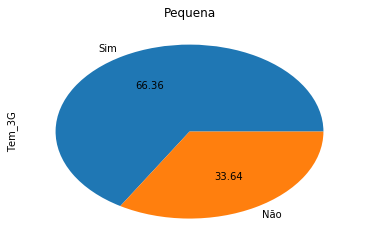

In [51]:
adim = dados2015.Tem_3G[dados2015.Familia == 'Pequena'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Pequena')

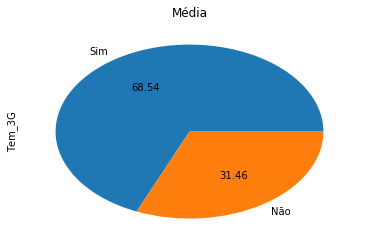

In [52]:
adim = dados2015.Tem_3G[dados2015.Familia == 'Média'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Média')

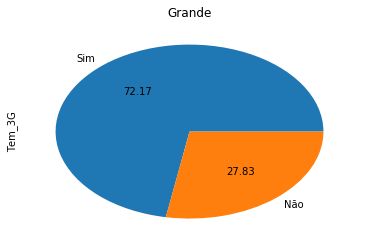

In [53]:
adim = dados2015.Tem_3G[dados2015.Familia == 'Grande'].value_counts()
adim.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Grande')

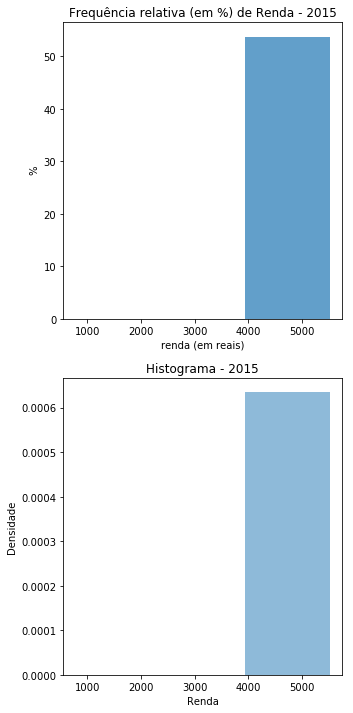

In [55]:
faixa = range(788,7092,1576)
V4614_cat = pd.cut(dados2015.V4614, bins=faixa)
V4614_cat.value_counts(sort=False, normalize=True)*100                        
from numpy import zeros_like

fig = plt.figure(figsize=(5,12))
plt.subplot(211)
plot = dados2015.V4614.plot.hist(bins=faixa,title='Frequência relativa (em %) de Renda - 2015', weights=zeros_like(dados2015.V4614)+1./dados2015.V4614.size*100, alpha=0.7)
plt.ylabel(' %')
plt.xlabel('renda (em reais)')

plt.subplot(212)
plot = dados2015.V4614.plot.hist(bins=faixa, title='Histograma - 2015', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')

___
## Conclusão 

Descreva aqui suas conclusões!